In [1]:
import pandas as pd
import _csv

caminho do arquivo

In [2]:
caminho_cirurgias_csv = "C:\\Users\\guilherme.lima\\Documents\\Cirurgias_por_grupo_Jupyter.ipynb"

Lendo arquivo

In [5]:
df_cirurgias = pd.read_csv(caminho_cirurgias_csv, sep=';', encoding='latin1')
df_cirurgias.head()

,CD_CIRURGIA,DS_CIRURGIA,CD_PRO_FAT,CD_GRUPO_CIRURGIA,CD_SUB_GRUPO_CIRURGIA,DS_SUB_GRUPO_CIRURGIA,DS_GRUPO_CIRURGIA,CODIGO_ESPECIALIDADE,DESCRICAO_ESPECIALIDADE
0,19,DERMOLIPECTOMIA PARA CORRECAO DE ABDOMEN EM AV...,30101271,22,199,CIRURGIA GERAL,CIRURGIA GERAL,13.0,CIRURGIA PLASTICA
1,108,FRENOTOMIA LINGUAL,30203015,3,20,LINGUA,CIRURGIA DE CABECA E PESCOCO,NaN,NaN
2,2021,HISTERECTOMIA TOTAL LAPAROSCOPICA,31303218,7,50,UTERO,CIRURGIA GINECOLOGICA,NaN,NaN
3,554,RECONSTRUCAO DA MAMA COM PROTESE E/OU EXPANSOR,30602262,10,64,CIRURGIA DE MAMA,CIRURGIA DE MAMA,NaN,NaN
4,1260,ENDARTERECTOMIA CAROTIDEA - CADA SEGMENTO ARTE...,30906199,1,4,CIRURGIA ARTERIAL,CIRURGIA VASCULAR E LINFATICA,NaN,NaN


Especialidades

In [15]:
df_cirurgias_especialidades = df_cirurgias[
    df_cirurgias['CODIGO_ESPECIALIDADE'].notna() &
    df_cirurgias['DESCRICAO_ESPECIALIDADE'].notna()
][['CODIGO_ESPECIALIDADE', 'DESCRICAO_ESPECIALIDADE']]
df_cirurgias_especialidades

,CODIGO_ESPECIALIDADE,DESCRICAO_ESPECIALIDADE
0,13.0,CIRURGIA PLASTICA
7,13.0,CIRURGIA PLASTICA
10,53.0,UROLOGIA
11,53.0,UROLOGIA
12,43.0,ORTOPEDIA E TRAUMATOLOGIA
...,...,...
2136,13.0,CIRURGIA PLASTICA
2144,11.0,CIRURGIA GERAL
2146,9.0,CIRURGIA DE CABEÇA E PESCOÇO
2150,13.0,CIRURGIA PLASTICA


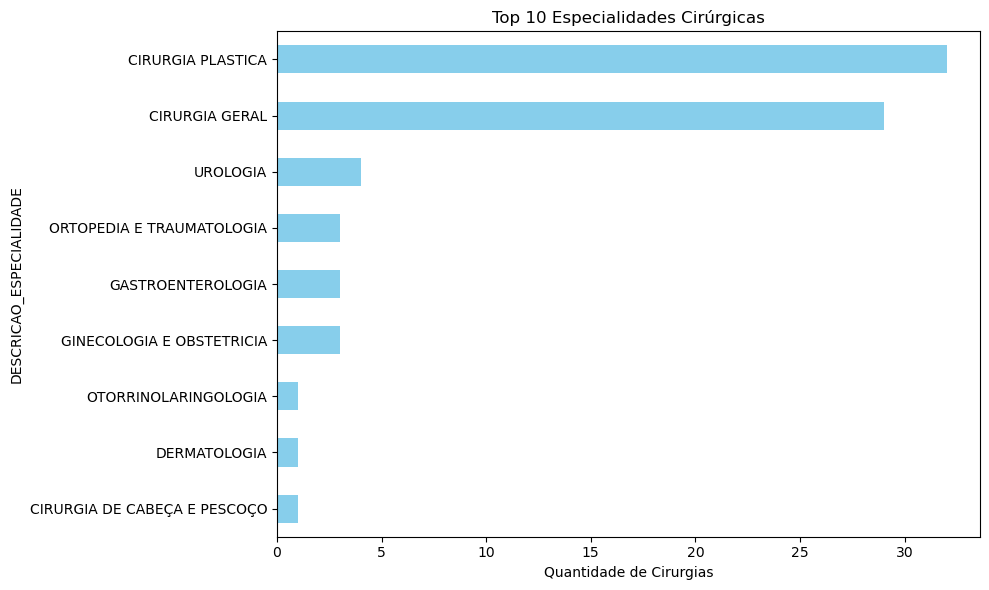

In [18]:
import matplotlib.pyplot as plt

# Contar ocorrências por especialidade
contagem = df_cirurgias_especialidades['DESCRICAO_ESPECIALIDADE'].value_counts().head(10)

# Plotar
plt.figure(figsize=(10, 6))
contagem.plot(kind='barh', color='skyblue')
plt.title('Top 10 Especialidades Cirúrgicas')
plt.xlabel('Quantidade de Cirurgias')
plt.gca().invert_yaxis()  # Especialidade com mais no topo
plt.tight_layout()
plt.show()


In [17]:
df_cirurgias_grupos = df_cirurgias[
    df_cirurgias['CD_GRUPO_CIRURGIA'].notna() &
    df_cirurgias['DS_GRUPO_CIRURGIA'].notna()
][['CD_GRUPO_CIRURGIA', 'DS_GRUPO_CIRURGIA']].drop_duplicates()
df_cirurgias_grupos

,CD_GRUPO_CIRURGIA,DS_GRUPO_CIRURGIA
0,22,CIRURGIA GERAL
1,3,CIRURGIA DE CABECA E PESCOCO
2,7,CIRURGIA GINECOLOGICA
3,10,CIRURGIA DE MAMA
4,1,CIRURGIA VASCULAR E LINFATICA
6,15,ORTOPEDIA E TRAUMATOLOGIA
10,19,CIRURGIA UROLOGICA
15,5,CIRURGIA DO APARELHO DIGESTIVO E ORGAOS
19,21,MÉTODOS INTERVENCIONISTAS POR IMAGEM
27,17,CIRURGIA PLASTICA


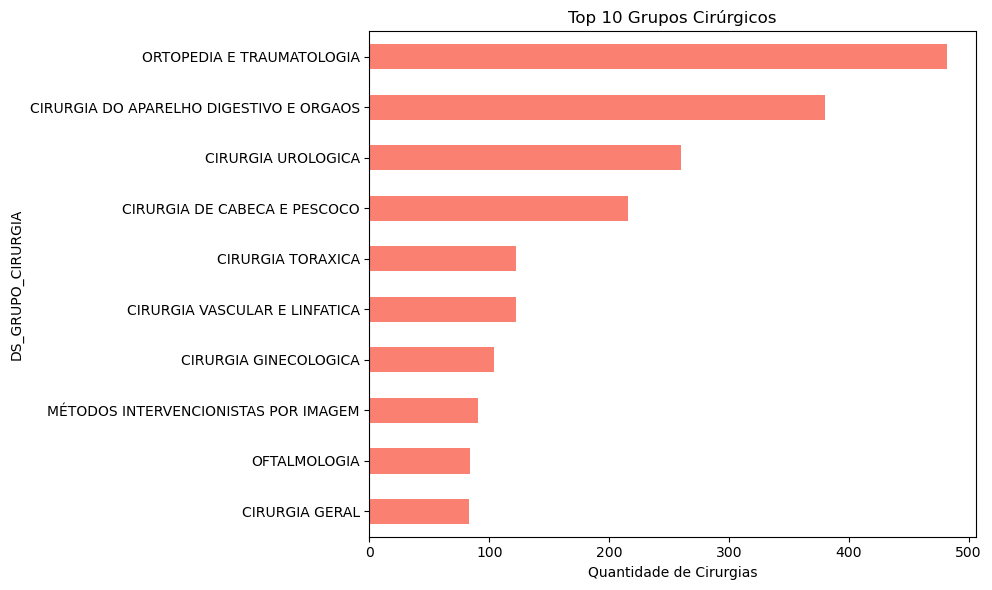

In [19]:
import matplotlib.pyplot as plt

# Contar quantas cirurgias há por grupo
contagem_grupos = df_cirurgias['DS_GRUPO_CIRURGIA'].value_counts().head(10)

# Plotar
plt.figure(figsize=(10, 6))
contagem_grupos.plot(kind='barh', color='salmon')
plt.title('Top 10 Grupos Cirúrgicos')
plt.xlabel('Quantidade de Cirurgias')
plt.gca().invert_yaxis()  # O maior grupo no topo
plt.tight_layout()
plt.show()
